# Manual Neural Network

In this notebook we will manually build out a neural network that mimics the TensorFlow API. This will greatly help your understanding when working with the real TensorFlow!

In [0]:
class Operation():
  def __init__(self, input_nodes=[]):
    self.input_nodes = input_nodes
    self.output_nodes = []
    
    for node in input_nodes:
      node.output_nodes.append(self)
  
    _default_graph.operations.append(self)
  
  def compute(self):
    pass
  
 

In [0]:
class add(Operation):
  def __init__(self,x,y):
    super().__init__([x,y])
    
  def compute(self, x_var, y_var):
    self.inputs = [x_var, y_var]
    return x_var+y_var

In [0]:
class multiply(Operation):
  def __init__(self,x,y):
    super().__init__([x,y])
    
  def compute(self, x_var, y_var):
    self.inputs = [x_var, y_var]
    return x_var * y_var

In [0]:
class matmul(Operation):
  def __init__(self,x,y):
    super().__init__([x,y])
    
  def compute(self, x_var, y_var):
    self.inputs = [x_var, y_var]
    
    return x_var.dot(y_var)

In [0]:
class Placeholder():
  
  def __init__(self):
    self.output_nodes = []
    _default_graph.placeholders.append(self)

In [0]:
class Variable():
  def __init__(self,initial_value=None):
    self.value = initial_value
    self.output_nodes = []
    
    _default_graph.variables.append(self)

In [0]:
class Graph():
  def __init__(self):
    self.operations = []
    self.placeholders = []
    self.variables = []
    
  def set_as_default(self):
    global _default_graph 
    _default_graph = self

### A Basic Graph

$$ z = Ax + b $$

With A=10 and b=1

$$ z = 10x + 1 $$

Just need a placeholder for x and then once x is filled in we can solve it!

In [0]:
g = Graph()

In [0]:
g.set_as_default()

In [0]:
A = Variable(10)

In [0]:
b = Variable(1)

In [0]:
x = Placeholder()

In [0]:
y = multiply(A,x)

In [0]:
z = add(y,b)

## Session

In [0]:
import numpy as np

### Traversing Operation Nodes

In [0]:
def traverse_postorder(operation):
  """
  PostOrder Transversal of Nodes. Basically makes sure computations ar done in
  the correct order (Ax first, then Ax + b).
  """
  nodes_postorder = []
  def recurse(node):
    if isinstance(node, Operation):
      for input_node in node.input_nodes:
        recurse(input_node)
    nodes_postorder.append(node)
    
  recurse(operation)
  return nodes_postorder

In [0]:
class Session:
    
    def run(self, operation, feed_dict = {}):
        """ 
          operation: The operation to compute
          feed_dict: Dictionary mapping placeholders to input values (the data)  
        """
        
        # Puts nodes in correct order
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:

            if type(node) == Placeholder:
                
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                
                node.output = node.value
                
            else: # Operation
                
                node.inputs = [input_node.output for input_node in node.input_nodes]

                 
                node.output = node.compute(*node.inputs)
                
            # Convert lists to numpy arrays
            if type(node.output) == list:
                node.output = np.array(node.output)
        
        # Return the requested node value
        return operation.output


In [0]:
sess = Session()

In [99]:
result = sess.run(operation=z,feed_dict={x:10})
result

101

In [0]:
g = Graph()

g.set_as_default()

A = Variable([[10,20],[30,40]])
b = Variable([1,2,])

x = Placeholder()

y = matmul(A,x)

z = add(y,b)

In [0]:
sess = Session()

In [102]:
sess.run(operation=z,feed_dict={x:10})

array([[101, 202],
       [301, 402]])

## Activation Function

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [0]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

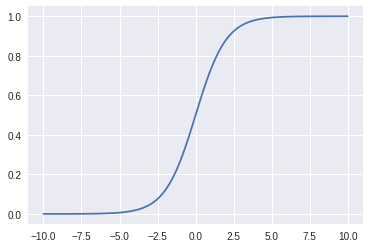

In [106]:
plt.plot(sample_z,sample_a)

### Sigmoid as an Operation


In [0]:
class Sigmoid(Operation):
  def __init__(self, z):
    super().__init__([z])
  
  def compute(self, z_val):
    return 1 / (1 + np.exp(-z_val))

## Classification Example


In [0]:
from sklearn.datasets import make_blobs

In [109]:
data = make_blobs(n_samples = 50, n_features = 2, centers=2, random_state =75)
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [0]:
features = data[0]
labels = data[1]

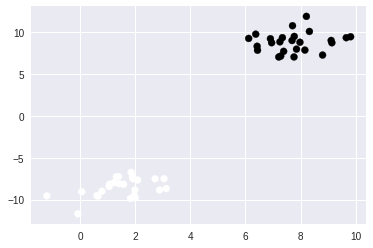

In [111]:
plt.scatter(features[:,0], features[:,1], c=labels)

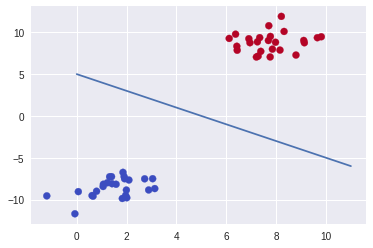

In [112]:
x = np.linspace(0,11,10)
y = -x + 5
plt.scatter(features[:,0], features[:,1], c=labels, cmap='coolwarm')
plt.plot(x, y)

## Defining the Perceptron

$$ y = mx + b $$

$$ y = -x + 5 $$

$$ f1 = mf2 + b , m=1$$

$$ f1 = -f2 + 5 $$

$$ f1 + f2 - 5 = 0 $$


### Convert to a Matrix Representation of Features

$$ w^Tx + b = 0 $$

$$   \Big(1, 1\Big)f - 5 = 0 $$

Then if the result is > 0 its label 1, if it is less than 0, it is label=0



### Example Point

Let's say we have the point f1=2 , f2=2 otherwise stated as (8,10). Then we have:

$$ 
\begin{pmatrix} 
1 , 1
\end{pmatrix} 
\begin{pmatrix} 
8 \\
10
\end{pmatrix} + 5 =  $$


In [113]:
np.array([1,1]).dot(np.array([[8],[10]])) - 5

array([13])

### Using an Example Session Graph

In [0]:
g = Graph()

In [0]:
g.set_as_default()

In [0]:
x = Placeholder()

w = Variable([1,1])

b = Variable(-5)

z = add(matmul(w,x),b)

In [0]:
a = Sigmoid(z)

In [0]:
sess = Session()

In [119]:
sess.run(operation=a,feed_dict={x:[8,10]})

0.999997739675702